Regularização L1 Lasso pode ser usada para seleção de fearture

onde:
    lambda é o parâmetro de regularização que controla a força da penalidade
    |theta| é o valor absoluto do j-ésimo parâmetro do modelo.

A adição da penalidade de regularização L1 incentiva o modelo a utilizar apenas os parâmetros
mais importantes, zerando os parâmetros menos relevantes.

Uso: Quando se fez Seleção de Feaatures ou quando se quer fazer seleção de features

Regularização L2 Ridge pode ser usada para seleção de fearture

onde:
    lambda é o parâmetro de regularização que controla a força da penalidade.
    (theta)^2 é o valor absoluto do j-ésimo parâmetro do modelo.

A penalidade L2 incentiva o modelo a ter parâmetros menores, pois a função de custo é
minimizada quando os valores dos parâmetros são pequenos.
A regularização L2 também tem uma propriedade chamada "smoothing" (suavização), que suaviza
as diferenças entre os valores dos parâmetros, reduzindo a complexidade do modelo e evitando o
overfitting.

Uso: Quando não se quer fazer seleção de features

A regularização L1 e L2 ( Elastic Net ) 

A penalidade L2 é proporcional ao quadrado da magnitude dos parâmetros, incentivando o modelo
a ter parâmetros menores.
A regularização Elastic Net é útil quando há muitas características nos dados que podem ser
irrelevantes para a predição.
O termo de regularização L1 ajuda a tornar os coeficientes dessas características irrelevantes
iguais a zero, enquanto o termo L2 ajuda a evitar a superestimação dos coeficientes restantes.

onde:
    lambda 1 é o parâmetro de regularização que controla a força da penalidade L1
    lambda 2 é o parâmetro de regularização que controla a força da penalidade L2

1. Quando lambda 1 é zero, a regularização é equivalente à regularização L2 (Ridge).
2. Quando lambda 2 é zero, a regularização é equivalente à regularização L1 (Lasso ).
3. Quando lamb

# 4. Quando usar cada regularização?

#### 4.1 Quando usar a regularização L1 ?

Quando não houver uma seleção de features antes do treinamento do
algoritmo

A regularização L1 é particularmente útil quando o conjunto de dados de treinamento tem
muitas características, algumas das quais podem ser irrelevantes ou redundantes.

A regularização L1 pode ajudar a selecionar as características mais relevantes para a predição,
eliminando as características irrelevantes.

#### 4.2 Quando usar a regularização L2 ?

Quando tiver ocorrido uma seleção de features antes do treinamento do
algoritmo

Em geral, a regularização L2 é útil quando o modelo tem muitos recursos e o conjunto de
dados de treinamento é relativamente pequeno. 

Ela também é eficaz quando os recursos são
altamente correlacionados, pois ajuda a reduzir a multicolinearidade.

#### 4.3 Quando usar a regularização Elastic Net ?

Quando tiver ocorrido uma seleção de features antes do treinamento do
algoritmo e você quer usar uma segunda seleção de features.

A regularização Elastic Net é uma combinação da regularização L1 e L2 e permite controlar a
força relativa de cada técnica de regularização usando um parâmetro de elasticidade. 

Isso pode torná-la mais flexível do que as outras duas técnicas, mas também mais difícil de ajustar.

# 0.1 Import Lib

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn import linear_model as lm
from sklearn.tree import DecisionTreeRegressor,ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# 0.2 Load Data

In [2]:
n_samples = 100
n_outliers = 5
n_features = 1

X,y,coef = make_regression(
                            n_samples=n_samples,
                            n_features=n_features,
                            n_informative=1,
                            noise=10, #para nao ter uma reta muito reta
                            coef=True, #Coeficiente que usou para criar a reta
                            random_state=0
                            )
# add outliers
X[:n_outliers] = 3 + 0.5 * np.random.normal( size=(n_outliers, n_features) )
y[:n_outliers] = -3 + 10 * np.random.normal( size=(n_outliers) )

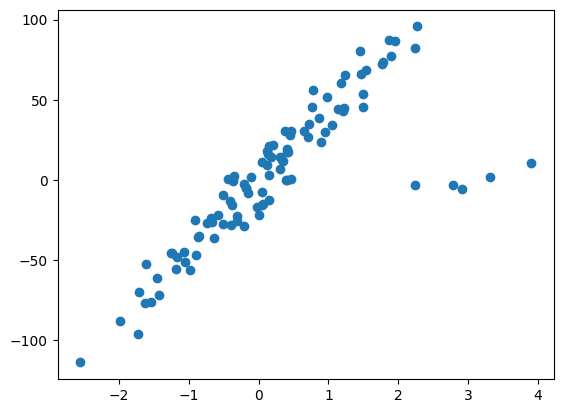

In [3]:
plt.scatter(X,y)

# 0.3 Modeling

In [4]:
# Linear Regression
lr = lm.LinearRegression()
lr.fit(X,y)

# Lasso - L! ( tende a zerar os parametros )
lasso = lm.Lasso(alpha=8 )
lasso.fit(X,y)

# Ridge - L2 ( smoothing - amenização dos parametros )
ridge = lm.Ridge( alpha=8 )
ridge.fit(X,y)

# Elasticnet - L!eL2 ( smoothing - amenização dos parametros )
elastic_net = lm.ElasticNet( alpha=8, l1_ratio=0.8 )
elastic_net.fit(X,y)

# RANSAC
ransac = lm.RANSACRegressor()
ransac.fit(X,y)
inlier = ransac.inlier_mask_
outlier = np.logical_not( ransac.inlier_mask_)

# Decision Tree
tree = DecisionTreeRegressor()
tree.fit(X,y)

# Extra Tree
etree = ExtraTreeRegressor()
etree.fit(X,y)

# Random Forest
rf = RandomForestRegressor()
rf.fit(X,y)

RandomForestRegressor()

# 0.3 Predict

In [5]:
X_plot = np.arange( X.min() , X.max() )[:, np.newaxis]

y_lm = lr.predict( X_plot )
y_lasso = lasso.predict( X_plot )
y_ridge = ridge.predict( X_plot )
y_ransac = ransac.predict( X_plot )
y_elastic_net = elastic_net.predict(X_plot)
y_tree = tree.predict(X_plot)
y_etree = etree.predict(X_plot)
y_rf = rf.predict(X_plot)

# 0.4 Graphs

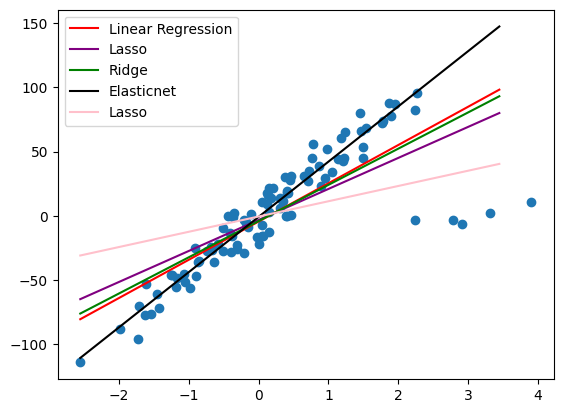

In [6]:
plt.scatter(X,y)
plt.plot(X_plot,y_lm,color='red',label='Linear Regression')
plt.plot(X_plot,y_lasso,color='purple',label='Lasso')
plt.plot(X_plot,y_ridge,color='green',label='Ridge')
plt.plot(X_plot,y_ransac,color='black',label='Elasticnet')
plt.plot(X_plot,y_elastic_net,color='pink',label='Lasso')
plt.legend()

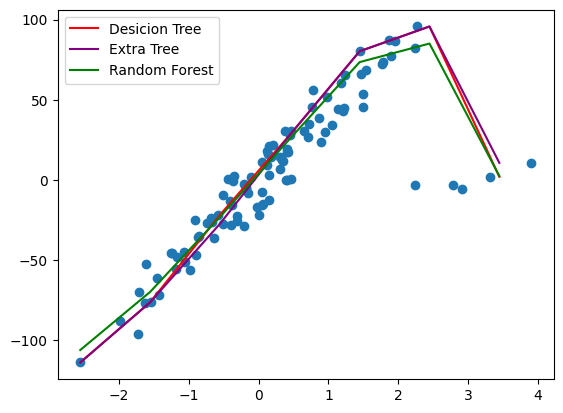

In [7]:
plt.scatter(X,y)
plt.plot(X_plot,y_tree,color='red',label='Desicion Tree')
plt.plot(X_plot,y_etree,color='purple',label='Extra Tree')
plt.plot(X_plot,y_rf,color='green',label='Random Forest')

plt.legend()

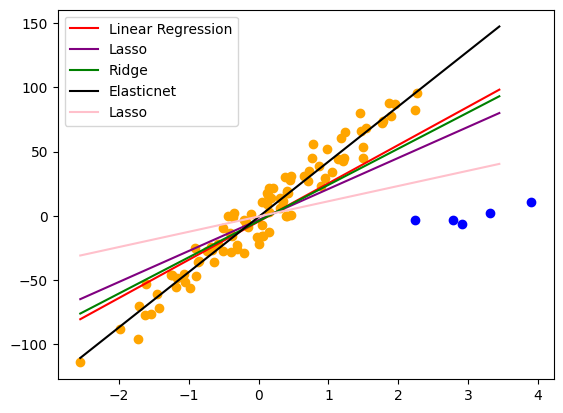

In [8]:
plt.scatter(X[inlier],y[inlier],color='orange')
plt.scatter(X[outlier],y[outlier],color='blue')
plt.plot(X_plot,y_lm,color='red',label='Linear Regression')
plt.plot(X_plot,y_lasso,color='purple',label='Lasso')
plt.plot(X_plot,y_ridge,color='green',label='Ridge')
plt.plot(X_plot,y_ransac,color='black',label='Elasticnet')
plt.plot(X_plot,y_elastic_net,color='pink',label='Lasso')
plt.legend()
plt.legend()

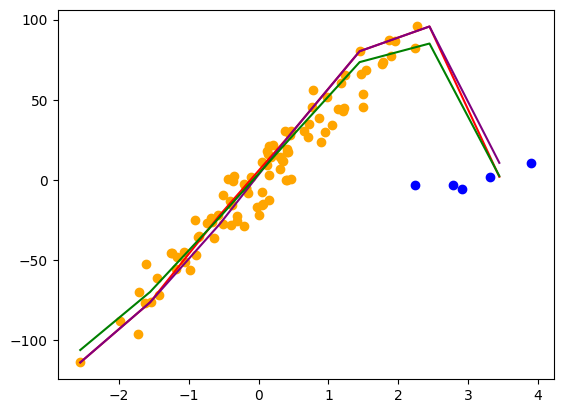

In [9]:
plt.scatter(X[inlier],y[inlier],color='orange')
plt.scatter(X[outlier],y[outlier],color='blue')
plt.plot(X_plot,y_tree,color='red',label='Desicion Tree')
plt.plot(X_plot,y_etree,color='purple',label='Extra Tree')
plt.plot(X_plot,y_rf,color='green',label='Random Forest')

In [10]:
print(
    f'''
Coef Original: {coef}
Coef Lienar Regression: {lr.coef_}
Coef Lasso - L1: {lasso.coef_}
Coef Ridge - L2: {ridge.coef_}
Coe ElasticNet - L1 e L2 {elastic_net.coef_}
Coef RANSAC: {ransac.estimator_.coef_}
coef DecisionTree: {tree.}
    '''
)

SyntaxError: f-string: invalid syntax (1820994357.py, line 9)

# 5.0 New Test

In [ ]:
n_samples = 100
n_outliers = 5
n_features = 6

X,y,coef = make_regression(
                            n_samples=n_samples,
                            n_features=n_features,
                            n_informative=2,
                            noise=10, #para nao ter uma reta muito reta
                            coef=True, #Coeficiente que usou para criar a reta
                            random_state=0
                            )
# add outliers
X[:n_outliers] = 3 + 0.5 * np.random.normal( size=(n_outliers, n_features) )
y[:n_outliers] = -3 + 10 * np.random.normal( size=(n_outliers) )

# Linear Regression
lr = lm.LinearRegression()
lr.fit(X,y)

# Lasso - L! ( tende a zerar os parametros )
lasso = lm.Lasso(alpha=20 )
lasso.fit(X,y)

# Ridge - L2 ( smoothing - amenização dos parametros )
ridge = lm.Ridge( alpha=20 )
ridge.fit(X,y)

# RANSAC
ransac = lm.RANSACRegressor()
ransac.fit(X,y)
inlier = ransac.inlier_mask_
outlier = np.logical_not( ransac.inlier_mask_)

X_plot = X.copy()

y_lm = lr.predict( X_plot )
y_lasso = lasso.predict( X_plot )
y_ridge = ridge.predict( X_plot )
y_ransac = ransac.predict( X_plot )

print(
    
    f'''
Coef Original: {list(coef)}
Coef Lienar Regression: {list(lr.coef_)}
Coef Lasso - L1: {list(lasso.coef_)}
Coef Ridge - L2: {list(ridge.coef_)}
Coef RANSAC: {list(ransac.estimator_.coef_)}
    '''
)


Coef Original: [0.0, 0.0, 24.65569398111561, 0.0, 56.8217593669845, 0.0]
Coef Lienar Regression: [-14.846730301233082, -15.126301084889514, 20.78968583851616, -14.405835665235125, 44.23946326427212, -5.732979307335886]
Coef Lasso - L1: [-0.0, -0.0, 0.0, -0.0, 22.450992694379906, -0.0]
Coef Ridge - L2: [-11.340864348358775, -11.359591405411718, 17.309203874083178, -11.391420986433827, 36.829722866571686, -3.7367071217682457]
Coef RANSAC: [-0.6672491257705484, 0.02003883020127617, 26.368098968000655, -1.4935181690664812, 55.11260211377658, 1.3053012849010368]
    
